<a href="https://colab.research.google.com/github/D-Arnav/Number-Detection-Using-Deep-Learning/blob/main/Number_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

# Creating the Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(30, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 30)                23550     
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


# Getting the Data

In [ ]:
[(x_train, y_train_label), (x_test, y_test_label)] = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train_label.shape)
print(x_test.shape)
print(y_test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Looking at the Sample Data

5


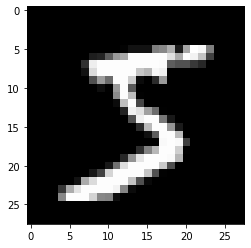

In [ ]:
plt.imshow(x_train[0], cmap='gray')
print(y_train_label[0])

# Processing Data to Fit into the Network

In [ ]:
x_train = x_train.astype(float) / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = x_test.astype(float) / 255.0
x_test = np.expand_dims(x_test, axis=-1)

y_train_label = keras.utils.to_categorical(y_train_label, 10)
y_test_label = keras.utils.to_categorical(y_test_label, 10)

# Training the Model

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train_label, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3644 - accuracy: 0.8949
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1764 - accuracy: 0.9484
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1430 - accuracy: 0.9578
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9628
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1067 - accuracy: 0.9681
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0962 - accuracy: 0.9711
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - accuracy: 0.9731
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0803 - accuracy: 0.9759
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0764 - accuracy: 0.9760
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.069

# Predicted the Lable For a Random Image From Testing Data

1/1 [==============================] - 0s 19ms/step
Predictions = [0.283, 0.0, 0.0, 0.0, 0.0, 0.0, 0.717, 0.0, 0.0, 0.0]
Predicted Label = 6
Random Label = 6
Correct


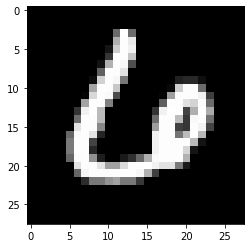

In [ ]:
random_index = random.randint(0, x_test.shape[0])
random_sample = x_test[random_index]
random_sample_label = np.argmax(y_test_label[random_index])
plt.imshow(np.squeeze(random_sample), cmap='gray')

predictions = model.predict(np.expand_dims(random_sample, axis=0))
predictions = [round(x, 3) for x in predictions[0]]
predicted_label = predictions.index(max(predictions))

print(f'Predictions = {predictions}')
print(f'Predicted Label = {predicted_label}')
print(f'Random Label = {random_sample_label}')
print('Correct' if predicted_label == random_sample_label else 'Incorrect')


# Checking the Accuracy of the Model

In [ ]:
evaluation = model.evaluate(x_test, y_test_label, batch_size=32, verbose=1)
print("Accuracy: {:.2f}%".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9695
Accuracy: 96.95%
